# Dicionário de feature engineering

### Importando as bibliotecas

In [1]:
import sys # Importando a biblioteca para acessar os níveis de pastas
from IPython.display import Image, display # Importando a biblioteca para exibir imagens em Python
sys.path.append('..') # Voltando um nível nas pastas do projeto para importar as funções e variáveis 
import params.consts as consts # Importando o pacote/biblioteca com as constantes do projeto

## Pre Processing (Pré Processamento)

### One Hot Enconder

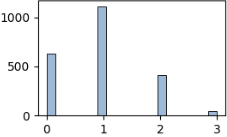

In [2]:
display(Image(consts.ONE_HOT_ENCODER, width=300)) # Exibindo o gráfico

O **One Hot Encoder** é uma técnica usada para converter variáveis categóricas em uma forma numérica compreensível para algoritmos de aprendizado de máquina. Como a maioria dos modelos não lida bem com variáveis categóricas, é necessário convertê-las em uma representação numérica. O problema com simplesmente atribuir números inteiros às categorias é que isso poderia sugerir uma relação ordinal entre elas, mesmo quando essa relação não existe.

**Como funciona:**

Se você tem uma variável categórica com n categorias, o One Hot Encoder criará n colunas binárias (valores 0 ou 1). Cada coluna corresponderá a uma das categorias, e um valor 1 será atribuído à coluna que representa a categoria presente naquele registro, enquanto as outras colunas terão valor 0.


**Exemplo:**

Se tivermos uma coluna chamada "Cor" com as categorias ['Vermelho', 'Azul', 'Verde'], o One Hot Encoder as transformaria em três colunas:

| Cor      | Vermelho | Azul | Verde |
|----------|----------|------|-------|
| Vermelho | 1        | 0    | 0     |
| Azul     | 0        | 1    | 0     |
| Verde    | 0        | 0    | 1     |

Essa abordagem evita que o modelo entenda que uma categoria tem maior peso ou ordem sobre outra, algo que ocorreria com um simples mapeamento numérico.

**Quando usar:**

- Para variáveis categóricas nominais (sem ordem), como cores, tipos de produtos, etc.
- Quando o número de categorias não é muito grande, pois o One Hot Encoding aumenta significativamente o número de colunas.
- Pode ser utilizado para números discretos que representam categorias, como códigos de regiões ou setores, onde os valores numéricos não têm significado ordinal (não há relação de ordem entre os números). Neste caso, o One Hot Encoder garante que o modelo não trate os valores como sequenciais ou com importância relativa.

### Standard Scaler

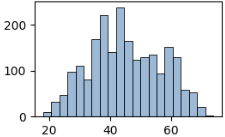

In [3]:
display(Image(consts.STANDARD_SCALER, width=300)) # Exibindo o gráfico

O **Standard Scaler** é uma técnica de normalização que transforma os dados para que tenham uma distribuição com média igual a 0 e desvio padrão igual a 1. Isso é feito subtraindo a média de cada valor e dividindo pelo desvio padrão da variável. Ele assume que os dados seguem uma distribuição normal ou aproximadamente normal.

**Exemplo:**

Se você tem uma variável de idade com média de 40 anos e desvio padrão de 15, a idade de 55 anos seria escalada assim:

Z = (55-40)/15 = 1

Isso significa que 55 anos está a uma unidade de desvio padrão acima da média.

**Quando usar:**

- Quando os dados seguem uma distribuição normal ou quando você deseja centralizar os dados.
- Modelos sensíveis à escala, como regressão logística, SVM, KNN e redes neurais, se beneficiam dessa técnica.

### Power Transformation

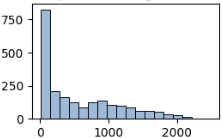

In [4]:
display(Image(consts.POWER_TRANSFORMATION, width=300)) # Exibindo o gráfico

O **Power Transformation** é uma técnica para transformar variáveis não normalmente distribuídas em uma forma mais próxima de uma distribuição normal. Esse método é útil para estabilizar a variância, corrigir a assimetria (skewness) e tornar os dados mais adequados para algoritmos que assumem uma distribuição normal dos dados.

**Tipos de Power Transformation:**
- Box-Cox Transformation: Aplica uma transformação paramétrica baseada em um parâmetro λ. É aplicável apenas a dados positivos.
- Yeo-Johnson Transformation: Similar ao Box-Cox, mas pode lidar com valores negativos ou zero.

**Exemplo:**

Se tivermos uma variável com alta assimetria à direita, o Power Transformation pode suavizar a cauda longa e trazer os dados para uma distribuição mais simétrica.

**Quando usar:**

- Para tratar variáveis com assimetria acentuada.
- Para estabilizar a variância, especialmente em regressões lineares e outros modelos baseados em suposições de normalidade.

### Min-Max Scaler

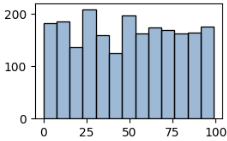

In [5]:
display(Image(consts.MIN_MAX_SCALER, width=300)) # Exibindo o gráfico

O **Min-Max Scaler** transforma os dados para que todos os valores estejam dentro de um intervalo específico, normalmente entre 0 e 1. Essa técnica reescala os dados linearmente com base no valor mínimo e máximo da variável.

**Exemplo:**

Se a sua variável de idade vai de 18 a 80, a idade de 40 seria transformada da seguinte maneira:

X = (40-18)/(80-18) = 0,355

Isso coloca o valor da idade no intervalo entre 0 e 1.

**Quando usar:**

- Quando você sabe que os dados têm uma distribuição uniforme ou quando os valores têm limites fixos.
- Frequentemente usado em algoritmos baseados em distâncias, como KNN e Redes Neurais, já que esses algoritmos são sensíveis à escala dos dados.

### Robust Scaler

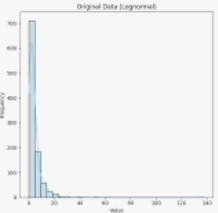

In [6]:
display(Image(consts.ROBUST_SCALER, width=300)) # Exibindo o gráfico

O **RobustScaler** transforma os dados utilizando a mediana e o intervalo interquartil (IQR) ao invés dos valores mínimo e máximo, tornando-o menos sensível a outliers. Ao subtrair a mediana e dividir pelo IQR, ele normaliza os dados focando na centralidade e dispersão das observações sem ser fortemente influenciado por valores extremos.

**Exemplo:**

Se a sua variável de idade tem uma mediana de 40 e um intervalo interquartil (IQR) de 20, a idade de 50 seria transformada assim:

X = (50 - 40) / 20 = 0.5

Aqui, o valor de idade foi normalizado com base na mediana e IQR, tornando-se mais robusto a possíveis outliers.

**Quando usar:**

- Quando seus dados contêm muitos outliers que podem distorcer as escalas tradicionais.
- É útil em algoritmos que dependem menos da magnitude exata dos dados, mas podem ser sensíveis à presença de outliers, como Regressão Linear e SVM.

## Feature Selection (Seleção de Colunas)

### SelectKBest

**SelectKBest** é uma técnica de Feature Selection do tipo Filter Method, que seleciona as K melhores features com base em uma função estatística, como o teste qui-quadrado, ANOVA, ou mutual information. Essa técnica é útil quando se deseja reduzir o número de variáveis, mantendo as mais relevantes para a variável alvo.

**Como funciona:**
- O SelectKBest aplica uma função estatística para cada feature individualmente, calculando sua relevância em relação à variável alvo.
- As features são classificadas de acordo com os seus scores, e as K features com maior pontuação são selecionadas para serem usadas no modelo.

**Exemplo:**
Se você tem um conjunto de dados com 100 variáveis e deseja selecionar apenas 10 para um modelo de classificação, você pode usar o SelectKBest com a função de teste F para calcular os escores de cada variável e manter as 10 melhores.

**Quando usar:**
- Quando você tem um grande número de variáveis e deseja reduzir esse número sem usar modelos complexos.
- Em problemas onde as variáveis são contínuas ou categóricas e você quer escolher aquelas mais fortemente relacionadas à variável alvo.
- Útil em uma etapa inicial de feature selection, antes de usar métodos mais complexos.

### VarianceThreshold

**VarianceThreshold** é uma técnica de Feature Selection que remove automaticamente todas as variáveis que têm variância abaixo de um determinado limiar. Como variáveis com variância baixa contêm pouca informação, elas podem ser removidas sem afetar a performance do modelo.

**Como funciona:**
- A variância de cada feature é calculada.
- Se a variância de uma feature for menor que o limiar definido (por padrão, 0), a feature é eliminada. Isso remove variáveis que são constantes ou quase constantes.
- As variáveis restantes são mantidas para o treinamento do modelo.

**Exemplo:**
Se uma feature em um conjunto de dados é praticamente constante, com quase todos os valores iguais, como 0s e 1s esporádicos, a VarianceThreshold vai eliminá-la, pois ela não contribui significativamente para a variabilidade dos dados.

**Quando usar:**
- Quando você suspeita que existem features quase constantes no conjunto de dados, o que pode não adicionar valor ao modelo.
- Antes de aplicar técnicas mais complexas de feature selection, para eliminar variáveis triviais.
- Em problemas de alta dimensionalidade, onde variáveis com pouca variação não são úteis.

### RFE - Recursive Feature Elimination

**Recursive Feature Elimination (RFE)** é uma técnica de Feature Selection do tipo Wrapper Method, que seleciona as features de forma recursiva, treinando um modelo e removendo as features menos importantes a cada iteração. O RFE é considerado um dos métodos mais eficazes, pois seleciona as variáveis baseando-se no impacto que elas têm no desempenho de um modelo específico.

**Como funciona:**
- O RFE começa treinando um modelo com todas as variáveis disponíveis.
- Após o treinamento, ele classifica as variáveis com base na importância de cada uma para o desempenho do modelo.
- Em seguida, a variável menos importante é removida, e o processo é repetido até que o número desejado de variáveis seja alcançado.

**Exemplo:**
Se você tem 50 features e deseja reduzir para 10, o RFE treina um modelo (como uma regressão logística ou uma árvore de decisão), remove a variável menos importante, e continua fazendo isso até restarem apenas as 10 mais importantes.

**Quando usar:**
- Quando você deseja selecionar features com base no desempenho do modelo em um conjunto específico de dados.
- Em situações onde a interação entre variáveis é importante e você quer otimizar o desempenho geral do modelo.
- É útil quando se trabalha com modelos sensíveis à quantidade de variáveis, como regressões lineares ou classificadores.

## Dimensionality Reduction (Redução de Dimensionalidade)

### PCA

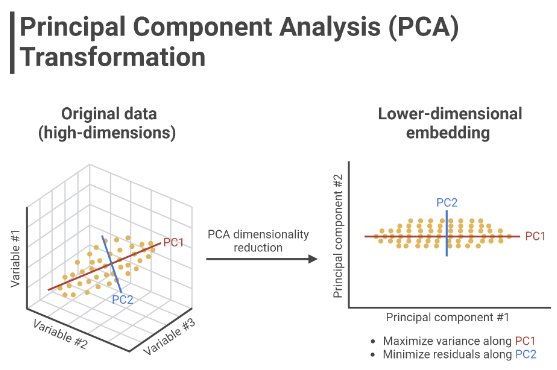

In [7]:
display(Image(consts.PCA, width=400)) # Exibindo o gráfico

O **PCA (Análise de Componentes Principais)** é uma técnica de redução de dimensionalidade que transforma um conjunto de variáveis possivelmente correlacionadas em um novo conjunto de variáveis não correlacionadas, chamadas de componentes principais. O objetivo do PCA é capturar a maior variabilidade dos dados com o menor número possível de componentes, facilitando a visualização, compressão e processamento dos dados.

Ao reduzir a dimensionalidade dos dados, o PCA elimina redundâncias e simplifica a estrutura dos dados, o que pode melhorar o desempenho de algoritmos de aprendizado de máquina, especialmente aqueles que sofrem com a "maldição da dimensionalidade" (dimensões excessivas tornam o processamento computacionalmente custoso e podem causar overfitting).

**Como funciona:**
- O PCA calcula os autovalores e autovetores da matriz de covariância dos dados para identificar as direções (componentes principais) que maximizam a variância dos dados.
- Os dados originais são projetados nesses novos eixos (componentes), e as componentes principais são ordenadas de acordo com a quantidade de variância que explicam. O primeiro componente explica a maior parte da variação, o segundo explica a maior parte da variação restante, e assim por diante.
- A dimensionalidade dos dados pode ser reduzida escolhendo um número de componentes principais que capturem uma alta porcentagem da variância total, sem perder muita informação.

**Exemplo:**
Imagine um conjunto de dados com duas variáveis fortemente correlacionadas, como peso e altura. O PCA identificaria que a maior parte da variabilidade nos dados pode ser explicada por um único componente principal, o qual representa uma combinação linear das duas variáveis. Isso permitiria a projeção desses dados em uma única dimensão, reduzindo de duas para uma.

**Quando usar:**

- Quando você tem dados com alta dimensionalidade e deseja reduzir o número de variáveis sem perder muita informação.
- Quando há correlação significativa entre as variáveis, o que pode causar redundância. O PCA elimina essa redundância projetando os dados em eixos ortogonais.
- Útil para visualização de dados multidimensionais em um espaço de 2D ou 3D.
- Pode ser utilizado para pré-processamento em modelos de aprendizado de máquina que são sensíveis a dados de alta dimensionalidade, como regressão linear, SVM e KNN, para evitar overfitting e reduzir o tempo de treinamento.
- Não deve ser usado quando as variáveis são interpretativamente importantes, pois o PCA combina e transforma as variáveis originais, dificultando a interpretação dos componentes principais.

## Resampling (Reamostragem)

### ROS - Random Over Sampling

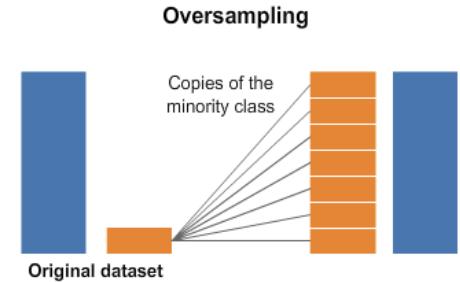

In [8]:
display(Image(consts.ROS, width=400)) # Exibindo o gráfico

**Random Over Sampling** é uma técnica usada para balancear conjuntos de dados desbalanceados, onde uma classe é muito mais representada que outra (ou outras). O objetivo do ROS é aumentar o número de amostras da classe minoritária, copiando aleatoriamente observações dessa classe para atingir um balanço entre as classes.

Ao aumentar artificialmente a classe minoritária, essa técnica evita que algoritmos de aprendizado de máquina favoreçam a classe majoritária, garantindo que ambos os grupos tenham o mesmo peso na modelagem.

**Como funciona:**
- O algoritmo identifica a classe minoritária no conjunto de dados.
- Ele seleciona, de forma aleatória, amostras dessa classe e as replica até que o número de amostras da classe minoritária seja igual (ou próximo) ao da classe majoritária.
- Essas cópias são adicionadas ao conjunto de dados original, criando um conjunto balanceado.

**Exemplo:**
Suponha que você tenha um conjunto de dados com 1000 amostras, onde 900 pertencem à classe "A" e apenas 100 pertencem à classe "B". Com o Random Over Sampling, você pode replicar aleatoriamente amostras da classe "B" até que ela também tenha 900 observações, equilibrando o conjunto de dados.

**Quando usar:**
- Quando há um desbalanceamento significativo entre as classes em um problema de classificação.
- Útil em situações onde a classe minoritária possui um impacto importante, como em detecção de fraudes, diagnósticos médicos, etc.
- É eficaz em evitar que algoritmos de aprendizado supervisionado subestimem a classe minoritária, mas pode aumentar o risco de overfitting, já que as mesmas amostras da classe minoritária são repetidas.

**Comparação:**
- Random Over Sampling aumenta o tamanho do conjunto de dados replicando amostras da classe minoritária, enquanto Random Under Sampling reduz o tamanho do conjunto ao remover amostras da classe majoritária.
- O ROS pode causar overfitting na classe minoritária, enquanto o RUS pode causar underfitting ao eliminar informações importantes da classe majoritária.
- O ROS é útil quando você deseja preservar todas as informações da classe majoritária, enquanto o RUS é preferível quando o tamanho do conjunto de dados é um problema e você pode se dar ao luxo de perder algumas amostras.

### RUS - Random Under Sampling

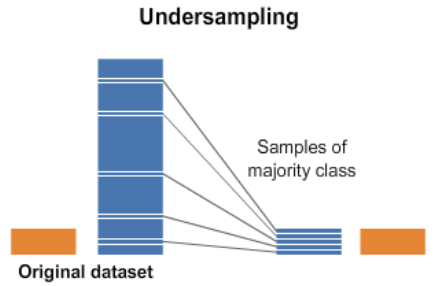

In [9]:
display(Image(consts.RUS, width=400)) # Exibindo o gráfico

**Random Under Sampling** é o oposto do Random Over Sampling, sendo outra técnica para balancear conjuntos de dados desbalanceados. O objetivo do RUS é reduzir o número de amostras da classe majoritária, removendo aleatoriamente observações dessa classe até que ela tenha o mesmo número de amostras que a classe minoritária.

Essa técnica tem como benefício reduzir o tamanho do conjunto de dados, o que pode diminuir o tempo de processamento e o custo computacional. No entanto, o RUS também pode levar à perda de informações importantes, especialmente quando as amostras removidas são representativas de uma parte significativa da classe majoritária.

**Como funciona:**
- O algoritmo identifica a classe majoritária no conjunto de dados.
- Ele seleciona, de forma aleatória, amostras dessa classe e as remove, reduzindo o número de observações até que a classe majoritária tenha o mesmo número (ou próximo) de amostras que a classe minoritária.
- O novo conjunto de dados, balanceado, é utilizado para treinar modelos de aprendizado de máquina.

**Exemplo:**
Usando o mesmo exemplo do Random Over Sampling: com 1000 amostras, onde 900 pertencem à classe "A" e 100 pertencem à classe "B", o Random Under Sampling removeria aleatoriamente 800 amostras da classe "A", deixando apenas 100 amostras dessa classe, equilibrando-a com a classe "B".

**Quando usar:**
- Quando há um grande desbalanceamento entre as classes e o conjunto de dados é muito grande, tornando o treinamento de modelos de machine learning mais caro e demorado.
- Útil quando você deseja reduzir o tempo de processamento sem a necessidade de aumentar a classe minoritária.
- Deve ser usado com cautela, pois a remoção de amostras da classe majoritária pode eliminar informações relevantes, levando a um desempenho inferior do modelo.

**Comparação:**
- Random Over Sampling aumenta o tamanho do conjunto de dados replicando amostras da classe minoritária, enquanto Random Under Sampling reduz o tamanho do conjunto ao remover amostras da classe majoritária.
- O ROS pode causar overfitting na classe minoritária, enquanto o RUS pode causar underfitting ao eliminar informações importantes da classe majoritária.
- O ROS é útil quando você deseja preservar todas as informações da classe majoritária, enquanto o RUS é preferível quando o tamanho do conjunto de dados é um problema e você pode se dar ao luxo de perder algumas amostras.

## Cross Validation (Validação Cruzada)

### K-Fold

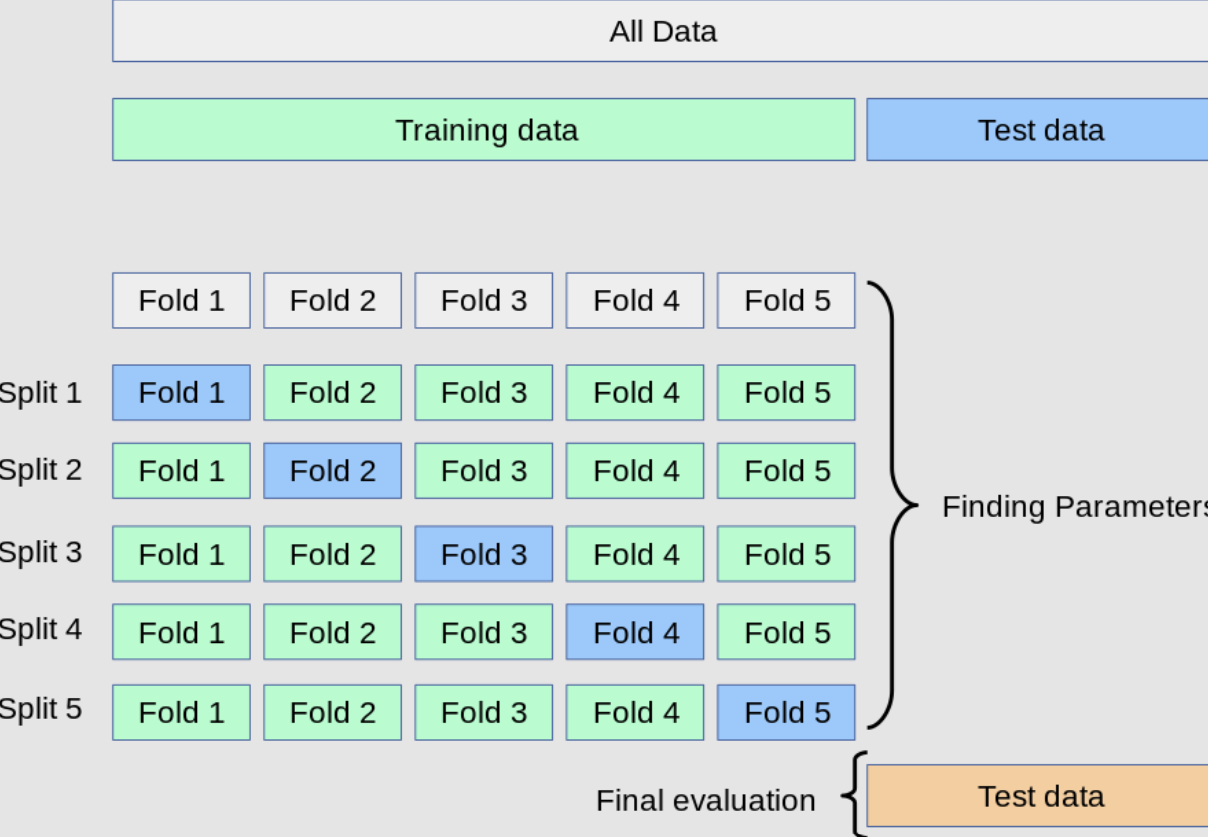

In [10]:
display(Image(consts.K_FOLD, width=400)) # Exibindo o gráfico

**K-Fold Cross-Validation** é uma técnica usada para avaliar a capacidade de generalização de um modelo de aprendizado de máquina. Ela divide o conjunto de dados em K partes ou "folds", e o modelo é treinado K vezes, utilizando K-1 partes para treinamento e a parte restante para validação.

**Como funciona:**
- O conjunto de dados é dividido em K partes de tamanhos aproximadamente iguais.
- O modelo é treinado K vezes, cada vez usando um fold diferente para validação e os restantes K-1 folds para treinamento.
- Ao final, a performance média das K iterações é calculada para fornecer uma estimativa robusta do desempenho do modelo.

**Exemplo:**
Se K = 5, o conjunto de dados é dividido em 5 partes. O modelo será treinado 5 vezes, em cada uma delas utilizando 4 partes para treino e 1 parte para validação.

**Benefícios:**
- Reduz a variância das estimativas de performance, proporcionando uma avaliação mais robusta em comparação à divisão simples treino/teste.
- Maximiza o uso dos dados para treino e validação.

**Desvantagens:**
- Maior custo computacional, pois o modelo é treinado várias vezes.

**Quando usar:**
- Ideal quando você tem uma quantidade limitada de dados e precisa de uma estimativa confiável de desempenho.

### Stratified K-Fold

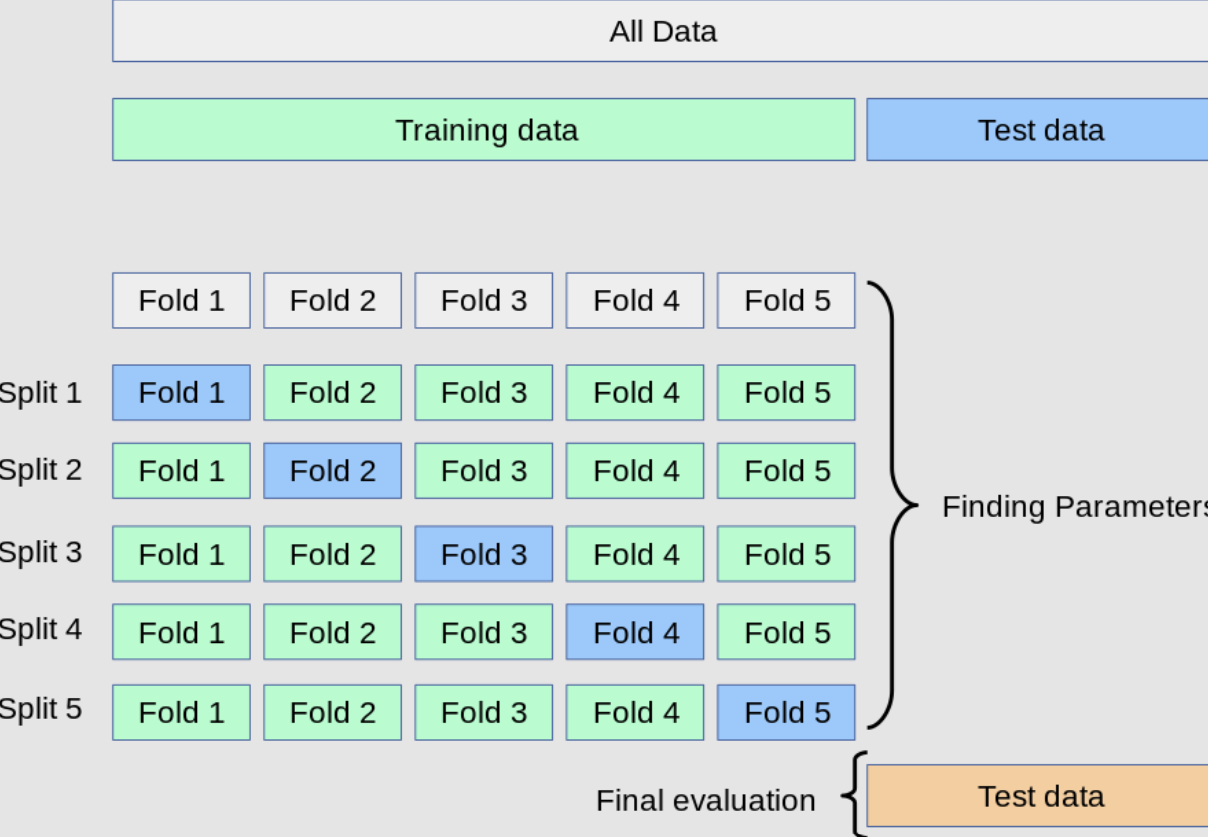

In [11]:
display(Image(consts.STRATIFIED_K_FOLD, width=400)) # Exibindo o gráfico

**Stratified K-Fold Cross-Validation** é uma variação do K-Fold onde a divisão dos dados em folds mantém a proporção das classes, ou seja, a proporção de cada classe é mantida em todos os folds.

**Como funciona:**
- O conjunto de dados é dividido em K partes, como no K-Fold, mas garantindo que a proporção das classes seja preservada em cada fold.
- O modelo é treinado K vezes, como no K-Fold, com a mesma abordagem de validação e cálculo de performance média.

**Exemplo:**
Se você tem um conjunto de dados com 80% da classe A e 20% da classe B, cada um dos K folds manterá essa mesma proporção.

**Benefícios:**
- Especialmente útil em problemas de classificação desbalanceada, onde as classes são desiguais em termos de número de amostras.
- Evita problemas de validação enviesada, onde um fold poderia ter uma distribuição desbalanceada das classes, afetando a avaliação do modelo.

**Desvantagens:**
- Mesma desvantagem de K-Fold em termos de maior custo computacional.

**Quando usar:**
- Recomendado sempre que houver desbalanceamento nas classes do conjunto de dados, para garantir uma avaliação justa do modelo.

## Hyperparameter Tuning (Otimização de Hiperparâmetros)

### Grid Search

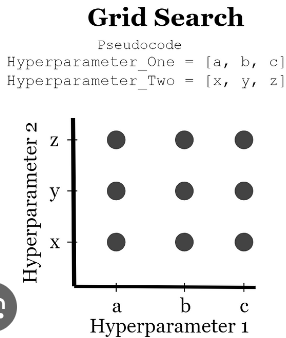

In [14]:
display(Image(consts.GRID_SEARCH, width=250)) # Exibindo o gráfico

**Grid Search** é uma técnica de otimização usada para ajustar hiperparâmetros de um modelo de aprendizado de máquina. Ela testa todas as combinações possíveis de um conjunto predefinido de hiperparâmetros, com o objetivo de encontrar a melhor configuração.

**Como funciona:**
- Defina uma "grade" de valores possíveis para os hiperparâmetros do modelo (ex: número de árvores, profundidade da árvore, taxa de aprendizado).
- O Grid Search treina o modelo com todas as combinações possíveis de hiperparâmetros da grade.
- Cada combinação é avaliada usando uma técnica de validação (geralmente Cross-Validation) e a combinação com o melhor desempenho é selecionada.

**Exemplo:**
Para um modelo de Random Forest, você pode definir uma grade para dois hiperparâmetros: número de árvores (100, 200, 300) e profundidade máxima (5, 10, 15). O Grid Search treinará o modelo em todas as combinações possíveis desses valores (9 combinações no total).

**Benefícios:**
- Garante que todas as combinações de hiperparâmetros serão testadas, aumentando a probabilidade de encontrar a configuração ótima.
- Pode ser combinado com validação cruzada para melhorar ainda mais a robustez da seleção.

**Desvantagens:**
- Extremamente custoso em termos de tempo e poder computacional, especialmente se a grade for grande e o modelo for complexo.
- Escalabilidade limitada quando há muitos hiperparâmetros ou intervalos grandes.

**Quando usar:**
- Ideal quando o conjunto de hiperparâmetros é relativamente pequeno e o custo computacional é aceitável.
- Geralmente utilizado em modelos de machine learning mais simples ou em experimentos de menor escala.